In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import spacy
from spacy import displacy
spacy.cli.download("en_core_web_lg")

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score , f1_score, accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from gensim.models import Word2Vec

lemma = WordNetLemmatizer()
lb = LabelEncoder()
nlp=spacy.load("en_core_web_lg")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Dataset:**
https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASET CB/Cyberbullying_Classification.csv')
df.head()

,tweet_text,cyberbullying_type,label
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0


In [ ]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
label                 0
dtype: int64

In [ ]:
np.unique(df['cyberbullying_type'])

array(['age', 'ethnicity', 'gender', 'not_cyberbullying',
       'other_cyberbullying', 'religion'], dtype=object)

In [ ]:
def Most_Words_used(tweets , num_of_words) :
    all_text = ''.join(df[tweets].values)

    all_text = re.sub(r'http\S+', '', all_text)
    all_text = re.sub(r'@\S+', '', all_text)
    all_text = re.sub(r'#\S+', '', all_text)
    all_text = re.sub(r'\d+', '',all_text)
    all_text = re.sub(r'[^\w\s]', '',all_text)


    words = all_text.split()

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    word_counts = Counter(words)

    top_words = word_counts.most_common(num_of_words)

    return top_words

In [ ]:
def DataPrep(text) :
    text = re.sub('<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    tokens = nltk.word_tokenize(text)

    #remove puncs
    punc = list(punctuation)
    words = [w for w in tokens if w not in punc]

    #remove stop words
    stop_words = set(stopwords.words('english'))
    words = [w.lower() for w in words if not w.lower() in stop_words]

    # lemmatization
    words = [lemma.lemmatize(w) for w in words]

    text = ' '.join(words)

    return text

In [ ]:
df['cleaned_text'] = df['tweet_text'].apply(DataPrep)

In [ ]:
print(f'There are around {int(df["cleaned_text"].duplicated().sum())} duplicated tweets, we will remove them.')

There are around 3174 duplicated tweets, we will remove them.


In [ ]:
df.drop_duplicates("cleaned_text", inplace=True)

In [ ]:
print(df['tweet_text'])

0        In other words #katandandre, your food was cra...
1        Why is #aussietv so white? #MKR #theblock #ImA...
2        @XochitlSuckkks a classy whore? Or more red ve...
3        @Jason_Gio meh. :P  thanks for the heads up, b...
4        @RudhoeEnglish This is an ISIS account pretend...
                               ...                        
47687    Black ppl aren't expected to do anything, depe...
47688    Turner did not withhold his disappointment. Tu...
47689    I swear to God. This dumb nigger bitch. I have...
47690    Yea fuck you RT @therealexel: IF YOURE A NIGGE...
47691    Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...
Name: tweet_text, Length: 44518, dtype: object


In [ ]:
df['tweet_len'] = [len(text.split()) for text in df.cleaned_text]

In [ ]:
df = df[df['tweet_len'] < df['tweet_len'].quantile(0.999)]

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(df['cleaned_text'] , df['label'] , train_size = 0.8)

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(x_train)
print("No. of feature words: ",len(vectorizer.get_feature_names_out()))

No. of feature words:  32474


In [ ]:
x_train = vectorizer.transform(x_train).toarray()
x_test = vectorizer.transform(x_test).toarray()

In [ ]:
train_vectors = pd.DataFrame(x_train,columns=vectorizer.get_feature_names_out())

In [ ]:
for i in range(5) :
    print(sorted(list(train_vectors.iloc[i,:]),reverse = True)[:20])
    print('--------------------------------------------------')

[0.5984900908984327, 0.4451825094569491, 0.39654900764378, 0.38669918910972423, 0.3699118355076169, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------------------------
[0.4750581919780719, 0.4750581919780719, 0.4195696712178858, 0.28237171125125504, 0.2666593503957504, 0.251243623409743, 0.24312092541520453, 0.2035364831721368, 0.14085090273492806, 0.13955893452100013, 0.13706134147875348, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------------------------
[0.6340351135789949, 0.4261572966214832, 0.4064803970782663, 0.29899134073045536, 0.2908802648534844, 0.2777696343432929, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------------------------
[0.44982867192937886, 0.3019310218700679, 0.29595933475434455, 0.295053515350494, 0.29357088181312324, 0.2813791880037237, 0.2590576994531879, 0.2502798924999559, 0.24394349236733745, 0.2241925888928754, 0.2079

In [ ]:
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train , y_train)

LogisticRegression(random_state=0)

In [ ]:
train_acc1 = lr.score(x_train , y_train)

In [ ]:
lr_pred = lr.predict(x_test)

test_acc1 = accuracy_score(y_test , lr_pred)

test_precision1 = precision_score(y_test , lr_pred , average='weighted')
test_recall1 = recall_score(y_test , lr_pred , average='weighted')
test_f1score1 = f1_score(y_test , lr_pred , average='weighted')

In [ ]:
print(f"The training accuracy for logistic regression : {(train_acc1*100):0.2f}%\n")
print(f"The testing accuracy for logistic regression : {(test_acc1*100):0.2f}%\n")
print(f"The precision for logistic regression : {test_precision1:0.2f}\n")
print(f"The recall for logistic regression : {test_recall1:0.2f}\n")
print(f"The f1 score for logistic regression : {test_f1score1:0.2f}\n")

The training accuracy for logistic regression : 90.69%

The testing accuracy for logistic regression : 86.15%

The precision for logistic regression : 0.85

The recall for logistic regression : 0.86

The f1 score for logistic regression : 0.85



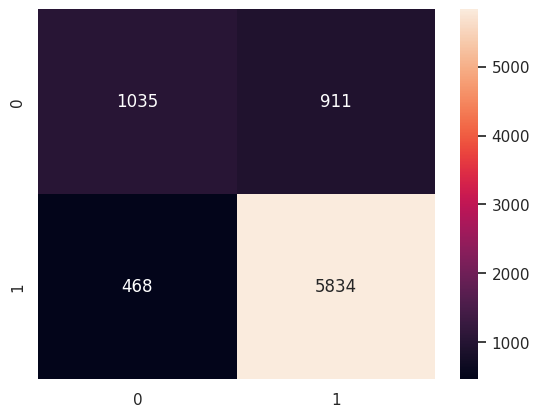

In [ ]:
lr_cm = confusion_matrix(y_test , lr_pred)
sns.heatmap(lr_cm, annot=True,fmt='3g')
plt.show()

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train , y_train)

RandomForestClassifier(random_state=42)

In [ ]:
train_acc2 = rf.score(x_train , y_train)

In [ ]:
rf_pred = rf.predict(x_test)

test_acc2 = accuracy_score(y_test , lr_pred)

test_precision2 = precision_score(y_test , rf_pred , average='weighted')
test_recall2 = recall_score(y_test , rf_pred , average='weighted')
test_f1score2 = f1_score(y_test , rf_pred , average='weighted')


In [ ]:
print(f"The training accuracy for Random Forest : {(train_acc2*100):0.2f}%\n")
print(f"The testing accuracy for Random Forest : {(test_acc2*100):0.2f}%\n")
print(f"The precision for Random Forest : {test_precision2:0.2f}\n")
print(f"The recall for Random Forest : {test_recall2:0.2f}\n")
print(f"The f1 score for Random Forest : {test_f1score2:0.2f}\n")

The training accuracy for Random Forest : 99.98%

The testing accuracy for Random Forest : 86.25%

The precision for Random Forest : 0.85

The recall for Random Forest : 0.87

The f1 score for Random Forest : 0.85

